In [1]:
#Here we run through how you can customise your figures using both StyleSheets and rcParams
#These both will achieve the same thing, which is to set 'default' figure settings for the rest of the code
#This is often much easier than manually setting fontsizes, linewidths etc for every figure you make

#Usual 3 imports you'd need. 
#%matplotlib inline simply makes sure figures are rendered properly in a notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
#Matplotlib comes with all of these by default, barring the two 'test' ones at the end
#The link below previews how each will look
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10', 'test', 'test2']


In [4]:
def somewavedata(): #Copied and pasted code from stackoverflow to make random 2D data
    f = 10         # frequency
    fs = 100       # sample frequency
    Ts = 1/fs      # sample period
    t = np.arange(0,0.5, Ts)   # time index
    c = 50             # speed of wave
    w = 2*np.pi *f     # angular frequency
    k = w/c            # wave number

    resolution = 0.02
    x = np.arange(-5, 5, resolution)
    y = np.arange(-5, 5, resolution)
    dx = np.array(x); M = len(dx)
    dy = np.array(y); N = len(dy)
    [xx, yy] = np.meshgrid(x, y);
    theta = np.pi / 4         # direction of propagation
    kx =  k* np.cos(theta)
    ky = k * np.sin(theta)
    plane_wave = np.sin(kx * xx + ky * yy - w * t[1])

    return plane_wave

In [6]:
#This function simply creates a figure containing two plots. No manual formatting is done to these
def Make_The_Plots():
    Fig = plt.figure(1)
    Fig.set_size_inches(10,2)

    ax = Fig.add_subplot(121)
    dat_x = np.linspace(0,2*np.pi,360)
    dat_y = np.sin(dat_x)
    for i in range(10):
        ax.plot(dat_x, dat_y+i,label=f"Order: {i+1}")
    ax.legend()
        
    ax2 = Fig.add_subplot(122)
    plane_wave = somewavedata()
    ax2.imshow(plane_wave)

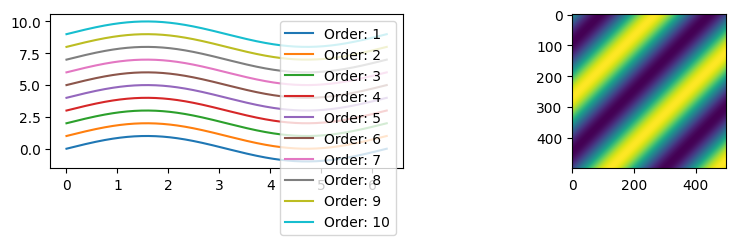

In [7]:
plt.style.use('default')
Make_The_Plots()

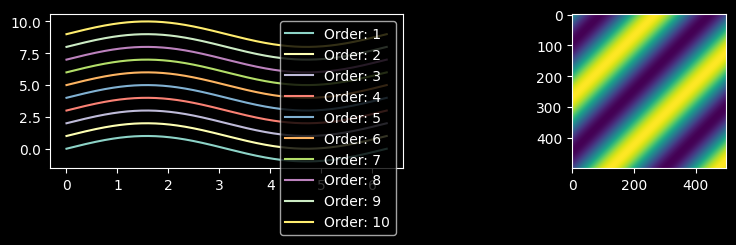

In [8]:
plt.style.use('dark_background')
Make_The_Plots()

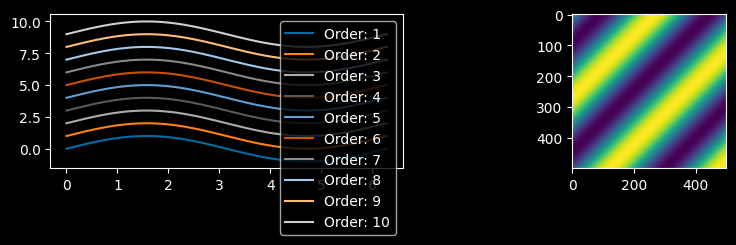

In [10]:
#Note that for some styles, not every aspect of a figure is changed. tableau-colorblind10 for example
#doesn't change the background colour of the axes or figure
plt.style.use('tableau-colorblind10')
Make_The_Plots()

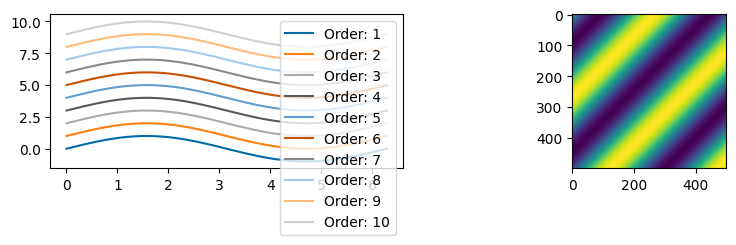

In [11]:
#So just bear in mind it might be good to reset to default before using a style file
plt.style.use('default')
plt.style.use('tableau-colorblind10')
Make_The_Plots()

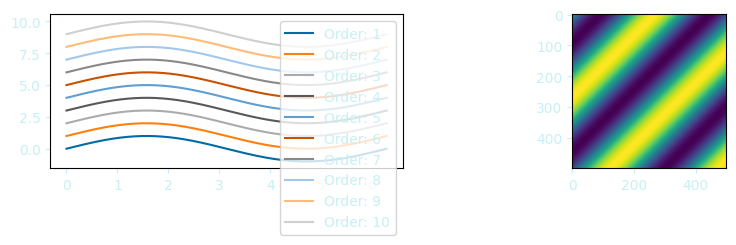

In [12]:
#Now we'll move onto rcParams, which is how all stylesheets work in the background
#For a list of all rcParams one can change, follow the link below
#https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-default-matplotlibrc-file

#matplotlib doesn't just accept strings for colours. Here, I'm inputting both rgb colours and rgba colours
#Using an rgba colour and setting alpha to 0 is the easiest way to make something transparent here
plt.rcParams.update({'text.color': (200/255,240/255,244/255),
                     'axes.labelcolor': (200/255,240/255,244/255),
                     'xtick.color': (200/255,240/255,244/255),
                     'ytick.color': (200/255,240/255,244/255),
                     'figure.facecolor': (0,0,0,0)})

Make_The_Plots()

In [14]:
#Now, time to instead put some rcParams into our very own stylesheet!
print(matplotlib.get_configdir()) #Make 'stylelib' directory in here
print(matplotlib.matplotlib_fname()) #under mpl-data already should exist this directory

#Just remember to make your file extension .mplstyle
#and to put it in either of the directories from those two lines

/home/local/.config/matplotlib
/home/local/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [15]:
#Restart the kernel to load in the new stylesheet. Alternatively this line might work for you
plt.style.reload_library()

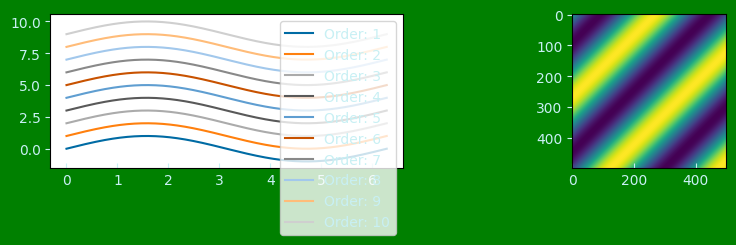

In [17]:
#Here, we're using a file I made which simply changes figure background to green and sets colours to light blue
plt.style.use('test')
Make_The_Plots()